<a href="https://colab.research.google.com/github/ishani-bhat4/Tender-Coconut-Classifier/blob/main/tender_coconut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for plotting confusion matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
train_path='/content/drive/MyDrive/base_dir/train'
valid_path='/content/drive/MyDrive/base_dir/validation'
test_path='/content/drive/MyDrive/base_dir/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224, 224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224, 224), batch_size=2, shuffle=False)

Found 326 images belonging to 4 classes.
Found 21 images belonging to 4 classes.
Found 21 images belonging to 4 classes.


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(train_path, target_size=(224, 224),batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(test_path, target_size=(224, 224), batch_size=2, shuffle=False)

Found 326 images belonging to 4 classes.
Found 21 images belonging to 4 classes.
Found 21 images belonging to 4 classes.


In [ ]:
densenet121 = tf.keras.applications.DenseNet121()

33188688/33188688 [==============================] - 0s 0us/step


In [ ]:
#Not considering last five layers of original efnb0 model
x = densenet121.layers[-6].output
y=tf.keras.layers.GlobalAveragePooling2D()(x) #UV:Added this extra
x=tf.keras.layers.Dropout(0.5)(y) #UV:Added this extra
predictions = tf.keras.layers.Dense(4,activation='softmax')(x)
#Model: Functional model, not a sequential model
model = tf.keras.models.Model(inputs=densenet121.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
#Training the last 23 layers will give us good results
#More Number layers has to be trained because sign language image data set is new data set
#How many layers to trained can be experiemented to obtain good accuracy
#Training weights for only last five layers.
#Reataining the weights of remaining layers as it was in MobileNet model
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
#Finding out the layers which will trained and not trained
for layer in model.layers:
  sp='	'[len(layer.name)-9:]
  print(layer.name,sp,  layer.trainable)

input_1 	 False
zero_padding2d  False
conv1/conv  False
conv1/bn 	 False
conv1/relu  False
zero_padding2d_1  False
pool1 	 False
conv2_block1_0_bn  False
conv2_block1_0_relu  False
conv2_block1_1_conv  False
conv2_block1_1_bn  False
conv2_block1_1_relu  False
conv2_block1_2_conv  False
conv2_block1_concat  False
conv2_block2_0_bn  False
conv2_block2_0_relu  False
conv2_block2_1_conv  False
conv2_block2_1_bn  False
conv2_block2_1_relu  False
conv2_block2_2_conv  False
conv2_block2_concat  False
conv2_block3_0_bn  False
conv2_block3_0_relu  False
conv2_block3_1_conv  False
conv2_block3_1_bn  False
conv2_block3_1_relu  False
conv2_block3_2_conv  False
conv2_block3_concat  False
conv2_block4_0_bn  False
conv2_block4_0_relu  False
conv2_block4_1_conv  False
conv2_block4_1_bn  False
conv2_block4_1_relu  False
conv2_block4_2_conv  False
conv2_block4_concat  False
conv2_block5_0_bn  False
conv2_block5_0_relu  False
conv2_block5_1_conv  False
conv2_block5_1_bn  False
conv2_block5_1_relu  False


In [ ]:
len(model.layers)

427

In [ ]:
model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
model.fit_generator(train_batches, steps_per_epoch=32, validation_data=valid_batches, validation_steps=2, epochs=50, verbose=2)

<ipython-input-14-df9661ac95af>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_batches, steps_per_epoch=32, validation_data=valid_batches, validation_steps=2, epochs=50, verbose=2)


Epoch 1/50
32/32 - 91s - loss: 1.3476 - accuracy: 0.4335 - val_loss: 1.2901 - val_accuracy: 0.5500 - 91s/epoch - 3s/step
Epoch 2/50
32/32 - 63s - loss: 1.2147 - accuracy: 0.6234 - val_loss: 1.1118 - val_accuracy: 0.6000 - 63s/epoch - 2s/step
Epoch 3/50
32/32 - 63s - loss: 1.0320 - accuracy: 0.6234 - val_loss: 0.9186 - val_accuracy: 0.5500 - 63s/epoch - 2s/step
Epoch 4/50
32/32 - 67s - loss: 0.8373 - accuracy: 0.6804 - val_loss: 0.7347 - val_accuracy: 0.7000 - 67s/epoch - 2s/step
Epoch 5/50
32/32 - 63s - loss: 0.6958 - accuracy: 0.7722 - val_loss: 0.6033 - val_accuracy: 0.8500 - 63s/epoch - 2s/step
Epoch 6/50
32/32 - 63s - loss: 0.5865 - accuracy: 0.8481 - val_loss: 0.4878 - val_accuracy: 0.9500 - 63s/epoch - 2s/step
Epoch 7/50
32/32 - 63s - loss: 0.4667 - accuracy: 0.9051 - val_loss: 0.3927 - val_accuracy: 1.0000 - 63s/epoch - 2s/step
Epoch 8/50
32/32 - 69s - loss: 0.3656 - accuracy: 0.9557 - val_loss: 0.3025 - val_accuracy: 1.0000 - 69s/epoch - 2s/step
Epoch 9/50
32/32 - 64s - loss: 0

In [ ]:
predictions=model.predict_generator(test_batches,steps=13, verbose=0)

<ipython-input-15-7b42784cf56c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_batches,steps=13, verbose=0)


In [ ]:
test_batches.class_indices

{'Tender coconut chopped with flesh': 0,
 'Tender coconut chopped without flesh': 1,
 'Tender coconut whole': 2,
 'coconut': 3}

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_labels= test_batches.classes

In [ ]:
cm=confusion_matrix(test_labels,predictions.argmax(axis=1))

In [ ]:
test_batches.class_indices

{'Tender coconut chopped with flesh': 0,
 'Tender coconut chopped without flesh': 1,
 'Tender coconut whole': 2,
 'coconut': 3}

Confusion matrix, without normalization
[[ 5  0  0  0]
 [ 0  3  0  0]
 [ 0  0 11  0]
 [ 0  0  0  2]]


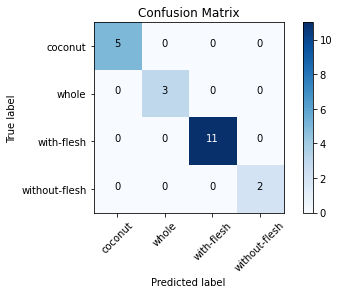

In [ ]:
cm_plot_labels=['with-flesh', 'without-flesh','whole','coconut']

plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

In [ ]:
#Printing Precision, Recall, F1 Score
print(classification_report(test_labels, predictions.argmax(axis=1),target_names=cm_plot_labels))

               precision    recall  f1-score   support

      coconut       1.00      1.00      1.00         5
        whole       1.00      1.00      1.00         3
   with-flesh       1.00      1.00      1.00        11
without-flesh       1.00      1.00      1.00         2

     accuracy                           1.00        21
    macro avg       1.00      1.00      1.00        21
 weighted avg       1.00      1.00      1.00        21

